In [1]:
from cdsaxs.fitter import Fitter
from cdsaxs.simulations.stacked_trapezoid import StackedTrapezoidSimulation
import numpy as np

### How to do a diffraction simulation using cdsaxs package?

#### Prepare the data

In [2]:
pitch = 100 #nm distance between two trapezoidal bars
qzs = np.linspace(-0.1, 0.1, 121)
qxs = 2 * np.pi / pitch * np.ones_like(qzs)

# Define initial parameters and multiples

#Initial parameters
dwx = 0.1
dwz = 0.1
i0 = 10
bkg = 0.1
y1 = 0.
height = 20.
bot_cd = 40.
swa = [90., 85.0]

langle = np.deg2rad(np.asarray(swa))
rangle = np.deg2rad(np.asarray(swa))

#simulation data
i_params = {'heights': height,
            # 'langles': langle,
            'rangles': rangle,
            'y_start': y1,
            'bot_cd': bot_cd,
            'dwx': dwx,
            'dwz': dwz,
            'i0': i0,
            'bkg_cste': bkg,
            'weight': None 
            }

#### Create instance of the Simulation class and call right method

In [3]:
Simulation1 = StackedTrapezoidSimulation(qys=qxs, qzs=qzs)

intensity = Simulation1.simulate_diffraction(fitparams=i_params)

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

#### Introducing a little noise to the simulated data to make it more realistic

Text(0.5, 0, 'qz')

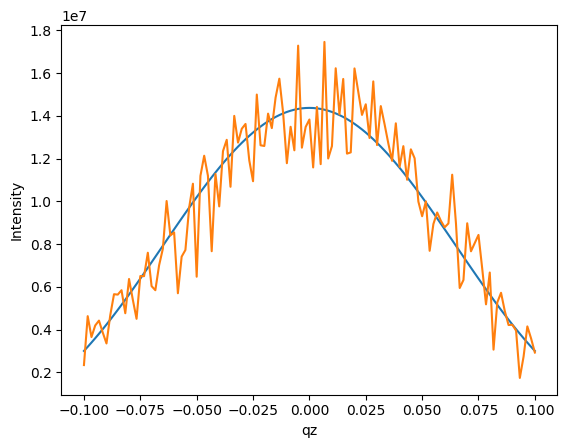

In [ ]:
import matplotlib.pyplot as plt
intensity_noisy = intensity + np.sqrt(intensity) * np.random.normal(0, 500, intensity.shape)

plt.plot(qzs, intensity)
plt.plot(qzs, intensity_noisy)
plt.ylabel('Intensity')
plt.xlabel('qz')

## How to fit the data using cdsaxs package?

#### Prepare the data

In [ ]:
var_ratio = 0.001
var_height = var_ratio * height[0]
var_langle = var_ratio * langle[0]
var_rangle = var_ratio * rangle[0]
initial_params = {'heights': {'value': height, 'variation': var_height},
                    'langles': {'value': langle, 'variation': var_langle},
                    'rangles': {'value': rangle, 'variation': var_rangle},
                    'y_start': {'value': y1, 'variation': 10E-5},
                    'bot_cd': {'value': bot_cd, 'variation': 10E-5},
                    'dwx': {'value': dwx, 'variation': 10E-5},
                    'dwz': {'value': dwz, 'variation': 10E-5},
                    'i0': {'value': i0, 'variation': 10E-5},
                    'bkg_cste': {'value': bkg, 'variation': 10E-5}
                    }

TypeError: 'float' object is not subscriptable

#### First create an instance of the Simulation class and pass it to the Fitter class along with data to fit

In [ ]:
Simulation2 = StackedTrapezoidSimulation(use_gpu=False, qys=qxs, qzs=qzs, initial_guess=initial_params)

Fitter1 = Fitter(Simulation=Simulation2, exp_data=intensity)

#### Then call the fit method of the Fitter class that you want

In [ ]:
cmaes = Fitter1.cmaes(sigma=100, ngen=200, popsize=1000, mu=10, n_default=12, restarts=10, tolhistfun=10E-5, ftarget=10, restart_from_best=True, verbose=False)
mcmc = Fitter1.mcmc(N=12, sigma = np.asarray([100] * 12), nsteps=100, nwalkers=1000, dir_save='./')


  0%|          | 0/100 [00:00<?, ?it/s]/nobackup/nd276333/emcee_env/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
  2%|▏         | 2/100 [00:00<00:06, 16.06it/s]/nobackup/nd276333/Workspace/cdsaxs/src/cdsaxs_fitting/simulations/stacked_trapezoid.py:393: RuntimeWarning: invalid value encountered in divide
  (1 - self.xp.exp(-1j * heights[:,:, self.xp.newaxis] / tan1 * val1)) / val1)
/nobackup/nd276333/Workspace/cdsaxs/src/cdsaxs_fitting/simulations/stacked_trapezoid.py:392: RuntimeWarning: invalid value encountered in divide
  form_factor = (tan1 * self.xp.exp(-1j * qys * y1[:,:, self.xp.newaxis]) *
 25%|██▌       | 25/100 [00:01<00:03, 21.36it/s]/nobackup/nd276333/Workspace/cdsaxs/src/cdsaxs_fitting/simulations/stacked_trapezoid.py:395: RuntimeWarning: invalid value encountered in divide
  (1 - self.xp.exp(-1j * heights[:,:, self.xp.newaxis] / tan2 * val2)) / val2)
/nobackup/

Saved to ./population_mcmc.csv
Saved to ./


#### variable "mcmc" now contains a dataframe with the fitted parameters and it's statistics

You can plot the correlation in a corner plot in the following way:

## testing the overlay class

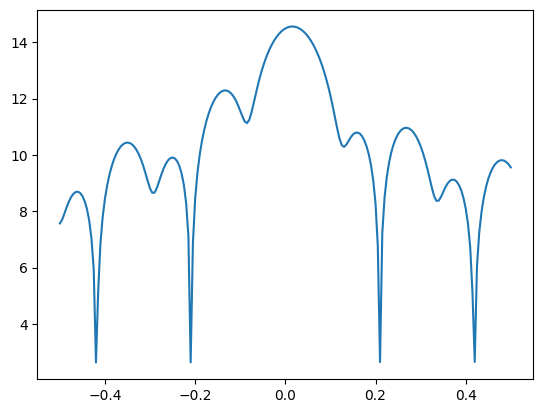

In [ ]:
from cdsaxs_fitting.simulations.strong_castle import StrongCastleSimulation
import numpy as np
import matplotlib.pyplot as plt
from cdsaxs_fitting.fitter import Fitter

#df must contain five extra parameters for the StrongCastleGeometry bottomCD, topCD, number of first trapezoid and number of second trapezoid and overlay.
# overlay is supposed to be the distance of the centres between the two sets of trapezoids

pitch = 100 #nm distance between two trapezoidal bars
qzs = np.linspace(-0.5, 0.5, 201)
qxs = 2 * np.pi / pitch * np.ones_like(qzs)
# qxs = np.linspace(-0.5, 0.5, 201)

#Initial parameters
dwx = 0.1
dwz = 0.1
i0 = 10
bkg = 0.1
y1 = 0.
height = 10.
bot_cd = 40.
top_cd = 20.
swa = [90., 90.0, 90.0, 90.0, 90.0, 90.0]
overlay = 10
#fixed parameters not be fitted
n1 = 3
n2 = 3

langle = np.deg2rad(np.asarray(swa))
rangle = np.deg2rad(np.asarray(swa))


overlay_params = {'heights': height,
            'langles': langle,
            'rangles': rangle,
            'y_start': y1,
            'bot_cd': bot_cd,
            'dwx': dwx,
            'dwz': dwz,
            'i0': i0,
            'bkg_cste': bkg,
            'overlay': overlay,
            'top_cd': top_cd,
            'n1': n1,
            'n2': n2,
            }

StrongCastle = StrongCastleSimulation(qys=-qxs, qzs=qzs)
intensity_strong_castle = StrongCastle.simulate_diffraction(params=overlay_params)

import matplotlib.pyplot as plt

plt.plot(qzs, np.log(intensity_strong_castle))
np.savetxt('./strong_castle.txt', intensity_strong_castle)

In [ ]:
var_ratio = 0.001
var_height = var_ratio * height
var_langle = var_ratio * langle[0]
var_rangle = var_ratio * rangle[0]


initial_params = {'heights': {'value': height, 'variation': var_height},
                    'langles': {'value': langle, 'variation': var_langle},
                    'rangles': {'value': rangle, 'variation': var_rangle},
                    'y_start': {'value': y1, 'variation': 10E-5},
                    'bot_cd': {'value': bot_cd, 'variation': 10E-5},
                    'dwx': {'value': dwx, 'variation': 10E-5},
                    'dwz': {'value': dwz, 'variation': 10E-5},
                    'i0': {'value': i0, 'variation': 10E-5},
                    'bkg_cste': {'value': bkg, 'variation': 10E-5},
                    'overlay': {'value': overlay, 'variation': 10E-5},
                    'top_cd': {'value': top_cd, 'variation': 10E-5},
                    'n1': n1,
                    'n2': n2,
                    }

StrongCastle1 = StrongCastleSimulation(qys=qxs, qzs=qzs, initial_guess=initial_params)

Fitter1 = Fitter(Simulation=StrongCastle1, exp_data=intensity_strong_castle)

cmaes = Fitter1.cmaes(sigma=100, ngen=20, popsize=100, mu=10, n_default=21, restarts=10, tolhistfun=10E-5, ftarget=10, restart_from_best=True, verbose=False)
mcmc = Fitter1.mcmc(N=21, sigma = np.asarray([100] * 21), nsteps=100, nwalkers=1000)
print(mcmc)

  0%|          | 0/100 [00:00<?, ?it/s]/nobackup/nd276333/emcee_env/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
/nobackup/nd276333/emcee_env/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
  1%|          | 1/100 [00:00<00:19,  5.16it/s]/nobackup/nd276333/emcee_env/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
/nobackup/nd276333/emcee_env/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
  2%|▏         | 2/100 [00:00<00:18,  5.19it/s]/nobackup/nd276333/Workspace/cdsaxs/src/cdsaxs_fitting/simulations/stacked_trapezoid.py:399: RuntimeWarning: invalid va

               mean       std  count        min        max   lower_ci  \
height1    9.847512  1.226296  65884   4.800986  18.170051   9.835205   
langle1    1.410613  0.113528  65884   0.055048   2.449421   1.409473   
langle2    1.595515  0.092376  65884   0.780465   2.411617   1.594588   
langle3    1.714207  0.092404  65884   1.061992   2.449246   1.713280   
langle4    1.497993  0.113913  65884   0.697217   2.775974   1.496850   
langle5    1.598323  0.110630  65884   0.159874   2.490120   1.597213   
langle6    1.608903  0.093411  65884   0.878070   2.487241   1.607965   
rangle1    1.614034  0.102561  65884   0.796876   2.609331   1.613004   
rangle2    1.604076  0.106154  65884   0.740679   3.119389   1.603011   
rangle3    1.497278  0.108550  65884   0.548841   2.947108   1.496189   
rangle4    1.667773  0.104900  65884   0.313611   2.743615   1.666720   
rangle5    1.505801  0.114916  65884   0.283635   2.343424   1.504648   
rangle6    1.495983  0.122274  65884   0.383239   2